In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
from qiskit.circuit.library.arithmetic.adders import CDKMRippleCarryAdder

In [18]:
qc = CDKMRippleCarryAdder(2, kind='full')

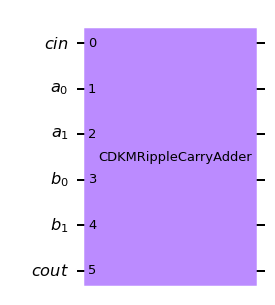

In [19]:
qc.draw()

In [20]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

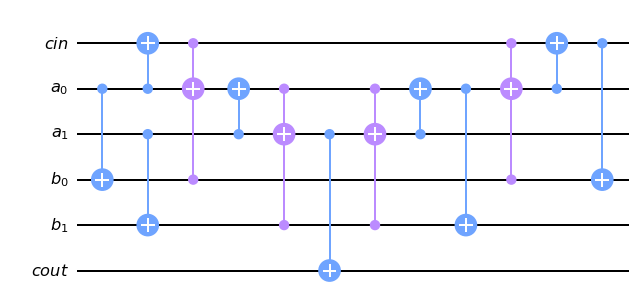

In [36]:
pass_ = Unroller(['cx','ccx'])
pm = PassManager(pass_)
basic_circuit = pm.run(qc) 
basic_circuit.draw(output='mpl')

In [52]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-28 06:19:13,251: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [54]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [55]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo

In [57]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibm_oslo')
backend_ex

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

In [58]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [59]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

In [60]:
# run this cell
backend = provider.get_backend('ibm_oslo')

Ripple Carry Adder gate


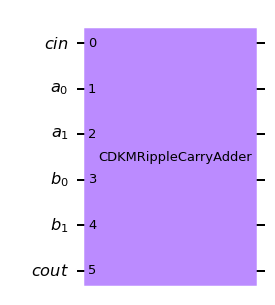



Transpiled RCA gate with all the required connectivity


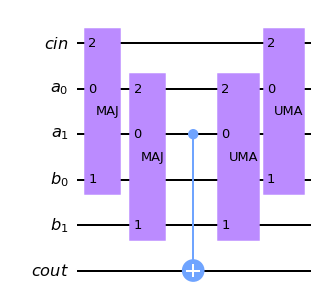

In [62]:
print('Ripple Carry Adder gate')
display(qc.draw())
print('\n\nTranspiled RCA gate with all the required connectivity')
qc.decompose().draw()

In [63]:
from qiskit.tools.monitor import job_monitor

In [96]:
def RCA2(a0, a1, b0,b1, backend, layout):
    
    qc = QuantumCircuit(6,3)
    qc.reset(range(3))
    
    # input 
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    
    #operation
    qc.cx(3,1)
    qc.cx(1,0)
    qc.cx(2,4)
    qc.ccx(0,3,1)
    qc.ccx(2,1)
    qc.ccx(1,4,2)
    qc.cx(2,5)
    qc.ccx(1,4,2)
    qc.cx(2,1)
    qc.cx(4,1)
    qc.ccx(0,4,1)
    qc.cx(1,0)
    qc.cx(0,3)
    
    qc.barrier()
    
    #measurement
    qc.measure(3,0)
    qc.measure(4,1)
    qc.measure(5,2)
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

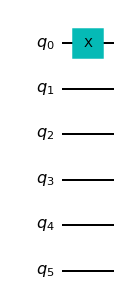

In [105]:
qca = QuantumCircuit(6)
qca.x(0)
qca.draw()

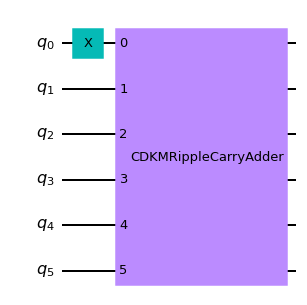

In [106]:

adder = CDKMRippleCarryAdder(2,kind='full').to_gate()
qca.append(adder,[0,1,2,3,4,5])

qca.draw()

In [ ]:
RCA = RCA2(0,0,0,0, 'ibm_oslo'